In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import skimage.measure
import random

In [11]:
n = 10000

images = []
labels = []
for i in range(n):
    width, height = 81, 81
    image = Image.new("1", (width, height), 0)
    draw = ImageDraw.Draw(image)
    x1, y1 = 0, random.randint(height//3, height//1.5)
    x2, y2 = width-1, random.randint(height//3, height//1.5)
    draw.line((x1, y1, x2, y2), fill=1 , width=1)
    image.save("random_line_image.png")
    convolved_image = Image.open(r"random_line_image.png").convert('RGB')
    rad = 10
    convolved_image = convolved_image.filter(ImageFilter.GaussianBlur(radius=rad))   
    convolved_image.save("convolved_image.png")
    convolved_array = 2.5*rad*np.array(convolved_image.convert('L'))
    small_array = skimage.measure.block_reduce(convolved_array, (27,27), np.average)
    mean = 0
    var = 256
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, small_array.shape)
    gauss = gauss.reshape(small_array.shape)
    noisy = small_array + gauss
    if random.randint(0,1) == 0:
        images.append(np.array(noisy))
        labels.append(0)
    else:
        images.append(np.transpose(np.array(noisy)))
        labels.append(1)
images = np.array(images)
labels = np.array(labels)


0


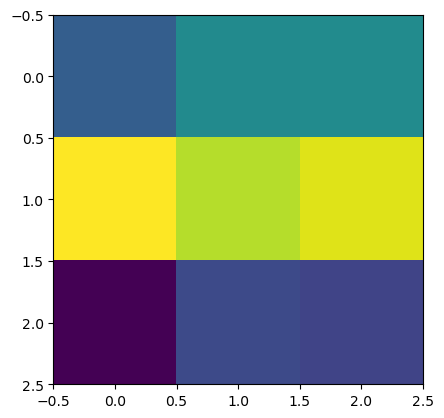

In [12]:
i = random.randint(0,n)
print(labels[i])
plt.imshow(images[i])

In [13]:
split = random.randint(0,n)
images_train = images[:split]
images_test = images[split:]
labels_train = labels[:split]
labels_test = labels[split:]

In [26]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape = (3,3)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(8, activation = "relu"),
tf.keras.layers.Dense(1, tf.keras.activations.hard_sigmoid)
])
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
cp1 = ModelCheckpoint('model.keras', save_best_only=True)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [28]:
with tf.device('/CPU:0'):
    history = model.fit(images_train, labels_train, epochs = 5 ,verbose = 1, batch_size = 10, validation_data=(images_test, labels_test), callbacks=[cp1])

Epoch 1/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8298 - loss: 2.6007 - val_accuracy: 0.9880 - val_loss: 0.1472
Epoch 2/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9969 - loss: 0.0286 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 3/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9993 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.5174e-04
Epoch 4/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 6.6320e-04 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 5/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 1.5137e-04 - val_accuracy: 1.0000 - val_loss: 1.1921e-07


In [29]:
from tensorflow.keras.models import load_model
model1 = load_model("model.keras")

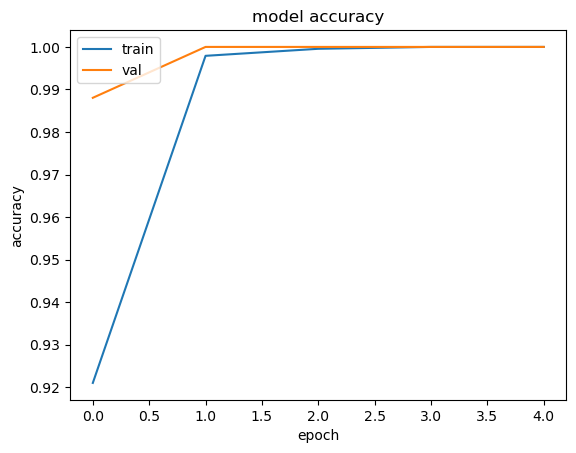

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()